In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics
import graphviz
from sklearn.tree import export_graphviz
import six
import sys
import pydotplus
from IPython.display import Image
df=pd.read_csv("/content/car_evaluation.csv")
value=['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc']
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [ ]:
from sklearn import preprocessing
string_to_int= preprocessing.LabelEncoder()
df=df.apply(string_to_int.fit_transform)
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


In [ ]:
from sklearn import preprocessing
string_to_int= preprocessing.LabelEncoder()
df=df.apply(string_to_int.fit_transform)
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


In [ ]:
feature_cols = ['vhigh.1','2.1', 'small', 'low', 'unacc']
X = df[feature_cols]
y = df['unacc']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier =DecisionTreeClassifier(criterion="entropy", random_state=100)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [ ]:
y_pred= classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [ ]:
data_p=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
data_p

,Actual,Predicted
1050,0,0
783,2,2
1305,2,2
616,0,0
266,2,2
...,...,...
862,0,0
582,0,0
243,2,2
287,2,2


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[124   0   0   0]
 [  0  19   0   0]
 [  0   0 356   0]
 [  0   0   0  20]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       124
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00       356
           3       1.00      1.00      1.00        20

    accuracy                           1.00       519
   macro avg       1.00      1.00      1.00       519
weighted avg       1.00      1.00      1.00       519



In [ ]:
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO

In [ ]:
dot_data = StringIO()

In [ ]:
num_classes = classifier.n_classes_  # Get the number of classes from the model
class_names = [str(i) for i in range(num_classes)]  # Generate class names dynamically

# Get the actual feature names from your dataset or feature engineering process.
# Replace '...' with the correct way to access your feature names.
feature_names = ['vhigh.1','2.1', 'small', 'low', 'unacc']

export_graphviz(classifier, out_file=dot_data, filled=True, rounded=True,
                special_characters=True, feature_names=feature_names, class_names=class_names)


In [ ]:
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())

In [ ]:
!pip install pydotplus

import pydotplus
from IPython.display import Image
from io import StringIO
from sklearn.tree import export_graphviz
try:
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    # If graph creation is successful, display the image
    Image(graph.create_png())  # Use graph.create_png() directly
except Exception as e:
    print(f"Error creating graph: e")
    print("Check the generated dot data for errors.")
    print(dot_data.getvalue())  # Print the dot data for inspection

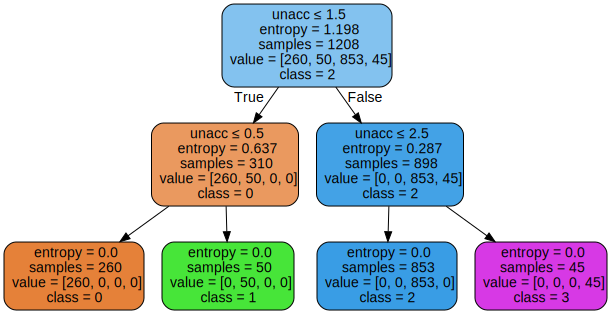

In [ ]:
#ID3
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
id3_classifier = DecisionTreeClassifier(criterion="entropy")
id3_classifier.fit(X_train, y_train)
num_classes = id3_classifier.n_classes_
class_names = [str(i) for i in range(num_classes)]
dot_data = export_graphviz(id3_classifier, out_file=None, feature_names=feature_cols,class_names=class_names,filled=True, rounded=True,special_characters=True)

# Visualize the decision tree
graph = graphviz.Source(dot_data)
graph

In [ ]:
Y_pred= id3_classifier.predict(X_train)
print("accuray:",accuracy_score(y_train, Y_pred))

accuray: 1.0


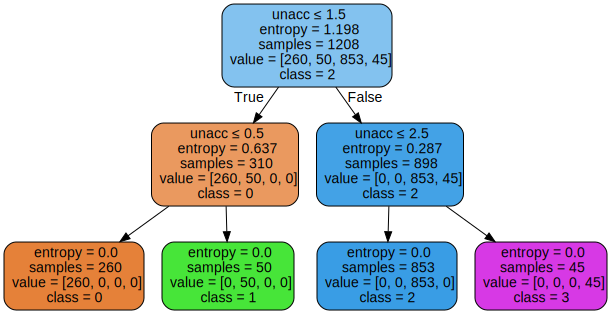

In [ ]:
!pip install graphviz

from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Assuming X, y, X_train, y_train, feature_cols are already defined

# Create a DecisionTreeClassifier with settings closer to C4.5
c45_like_classifier = DecisionTreeClassifier(criterion="entropy", splitter="best") # 'best' for a C4.5-like split behavior
c45_like_classifier.fit(X_train, y_train)

# Get the number of classes from the fitted model
num_classes = c45_like_classifier.n_classes_
class_names = [str(i) for i in range(num_classes)]

# Export the decision tree to a DOT format
dot_data = export_graphviz(c45_like_classifier, out_file=None,
                           feature_names=feature_cols,
                           class_names=class_names,
                           filled=True, rounded=True,
                           special_characters=True)

# Visualize the decision tree
graph = graphviz.Source(dot_data)
graph


In [ ]:
Y_pred= c45_like_classifier.predict(X_train)
print("accuray:",accuracy_score(y_train, Y_pred))

accuray: 1.0


Feature: vhigh.1, Chi2 Stat: 5.60, p-value: 0.133
Feature: 2.1, Chi2 Stat: 118.32, p-value: 0.000
Feature: small, Chi2 Stat: 22.24, p-value: 0.000
Feature: low, Chi2 Stat: 51.80, p-value: 0.000
Feature: unacc, Chi2 Stat: 579.30, p-value: 0.000


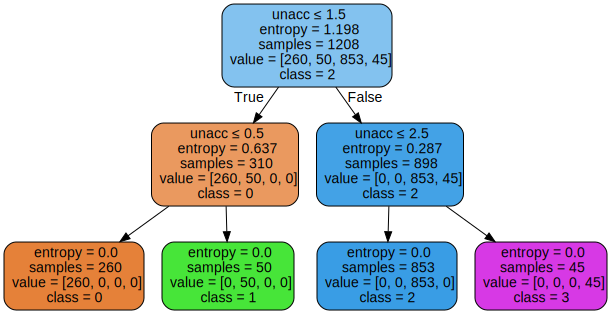

In [ ]:
#CHI-SQUARE
!pip install graphviz

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.feature_selection import chi2
import graphviz

# Assuming X, y, X_train, y_train, feature_cols are already defined

# Calculate Chi-Squared stats for feature selection
chi2_stats, p_values = chi2(X_train, y_train)

# Create a DecisionTreeClassifier
chi2_tree = DecisionTreeClassifier(criterion="entropy", splitter="best")

# Fit the classifier (no direct use of chi2 stats in fitting)
chi2_tree.fit(X_train, y_train)

# Get the number of classes from the fitted model
num_classes = chi2_tree.n_classes_
class_names = [str(i) for i in range(num_classes)]

# Export the decision tree to a DOT format
dot_data = export_graphviz(chi2_tree, out_file=None,
                           feature_names=feature_cols,
                           class_names=class_names,
                           filled=True, rounded=True,
                           special_characters=True)

# Print Chi-Squared stats for reference (optional)
for feature, stat, p_val in zip(feature_cols, chi2_stats, p_values):
    print(f"Feature: {feature}, Chi2 Stat: {stat:.2f}, p-value: {p_val:.3f}")

# Visualize the decision tree
graph = graphviz.Source(dot_data)
graph



In [ ]:
Y_pred= chi2_tree.predict(X_train)
print("accuray:",accuracy_score(y_train, Y_pred))

accuray: 1.0



Building Regression Tree...


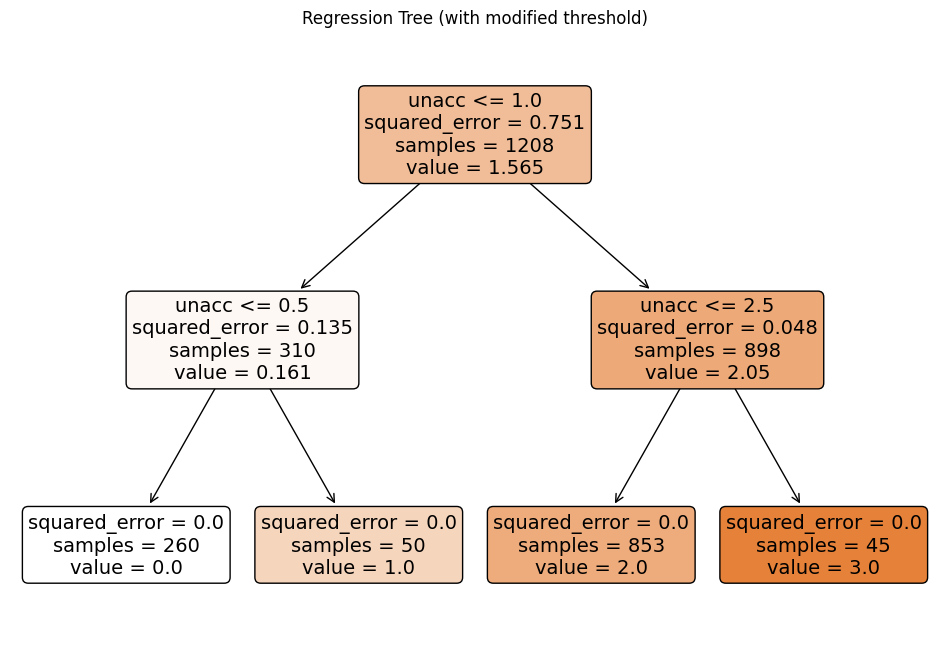

accuray: 1.0


In [ ]:
#CART
!pip install graphviz
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, plot_tree
import matplotlib.pyplot as plt
import graphviz
import pandas as pd

# --- Regression Tree ---
print("\nBuilding Regression Tree...")
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# Modify the threshold of the root node (index 0)
regressor.tree_.threshold[0] = 1.0

# Visualize using plot_tree (Matplotlib)
plt.figure(figsize=(12, 8))
plot_tree(regressor, feature_names=feature_cols, filled=True, rounded=True)
plt.title("Regression Tree (with modified threshold)")
plt.show()
Y_pred= regressor.predict(X_train)
print("accuray:",accuracy_score(y_train, Y_pred))

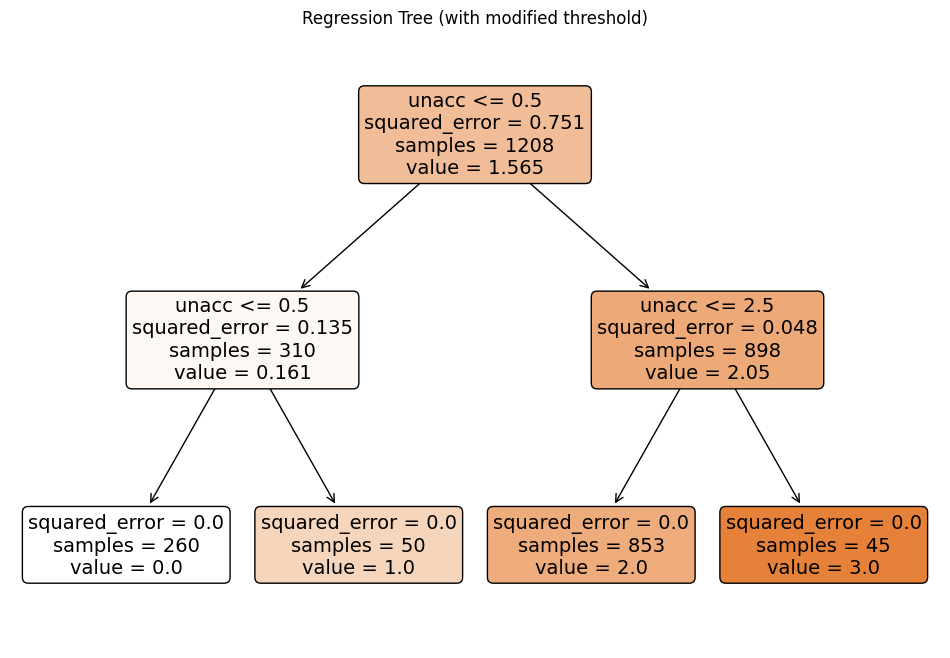

accuray: 0.9586092715231788


In [ ]:
# Modify the threshold of the root node (index 0.5)
regressor.tree_.threshold[0] = 0.5

# Visualize using plot_tree (Matplotlib)
plt.figure(figsize=(12, 8))
plot_tree(regressor, feature_names=feature_cols, filled=True, rounded=True)
plt.title("Regression Tree (with modified threshold)")
plt.show()
Y_pred= regressor.predict(X_train)
print("accuray:",accuracy_score(y_train, Y_pred))

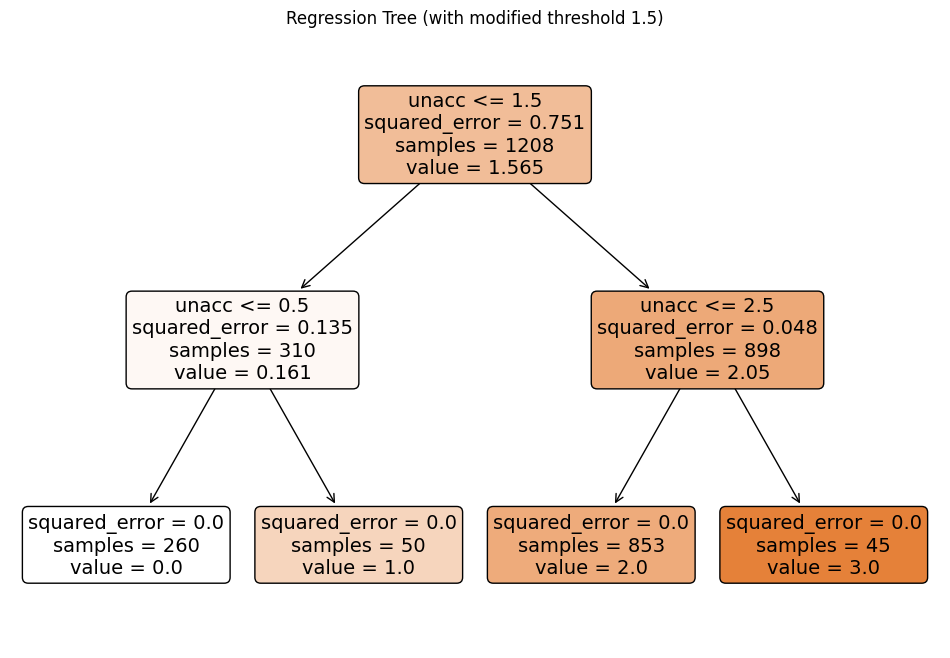

accuray: 1.0


In [ ]:
# Modify the threshold of the root node (index 1.5)
regressor.tree_.threshold[0] = 1.5

# Visualize using plot_tree (Matplotlib)
plt.figure(figsize=(12, 8))
plot_tree(regressor, feature_names=feature_cols, filled=True, rounded=True)
plt.title("Regression Tree (with modified threshold 1.5)")
plt.show()
Y_pred= regressor.predict(X_train)
print("accuray:",accuracy_score(y_train, Y_pred))

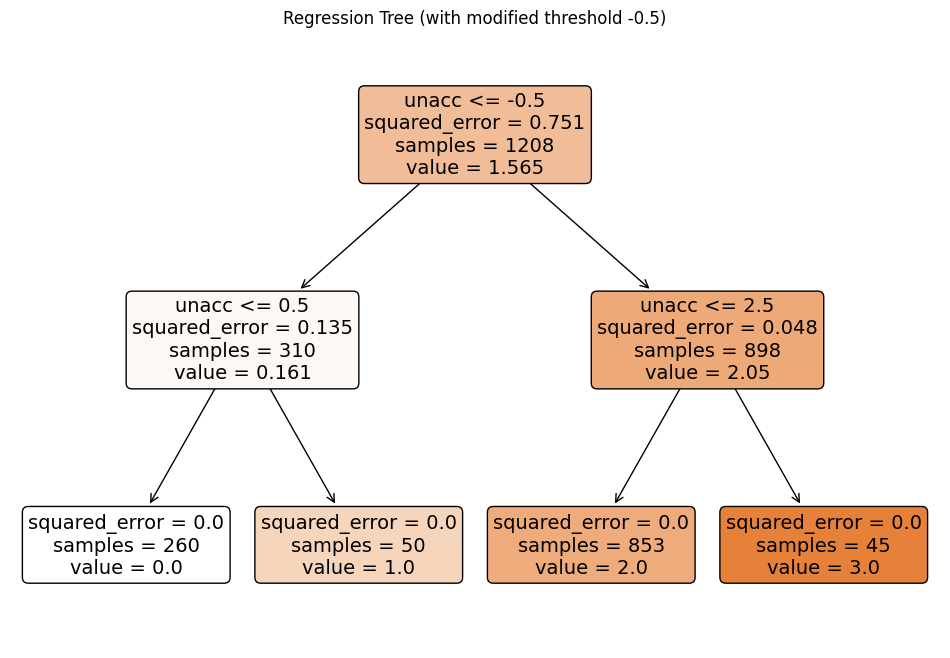

accuray: 0.7433774834437086


In [ ]:
# Modify the threshold of the root node (index -0.5)
regressor.tree_.threshold[0] = -0.5

# Visualize using plot_tree (Matplotlib)
plt.figure(figsize=(12, 8))
plot_tree(regressor, feature_names=feature_cols, filled=True, rounded=True)
plt.title("Regression Tree (with modified threshold -0.5)")
plt.show()
Y_pred= regressor.predict(X_train)
print("accuray:",accuracy_score(y_train, Y_pred))